# Homework 5 writeup solutions

## Name: Jaiden Atterbury - Section B

## Problem 1

You are going to need to load in your data again. Do that in the cell below.

In [1]:
import numpy as np

carbon_data = np.genfromtxt("CO2_data.csv", delimiter=",")
year = carbon_data[:, 0]
CO2 = carbon_data[:, 1]

Since we will be plotting curves with optimal parameters, we will need to include the code that finds these parameters.

In [2]:
import scipy.optimize

# Exponential fit (part b)
def sumSquaredError(a, b, r):
    y = lambda t: a + b * np.exp(r * t)
    error = np.sum((y(year) - CO2) ** 2)
    return error

sse_adapter = lambda p: sumSquaredError(p[0], p[1], p[2])

init_guess = np.array([300, 30, 0.03])
sse_optimal = scipy.optimize.fmin(sse_adapter, init_guess)

# Exponential + Sinusoidal fit (parts f and g)
def seasonal_sse(a, b, r, c, d, e):
    y = lambda t: a + b * np.exp(r * t) + c * np.sin(d * (t - e))
    error = np.sum((y(year) - CO2) ** 2)
    return error

seas_sse_adapt = lambda p: seasonal_sse(p[0], p[1], p[2], p[3], p[4], p[5])

init_guess_2 = np.array([300, 30, 0.03, -5, 4, 0])
opt_init_guess = np.append(sse_optimal, init_guess_2[3:6])
seas_optimal = scipy.optimize.fmin(seas_sse_adapt, opt_init_guess, maxiter=2000)

# Create anonymous function to plot each curve
sse_model = lambda t, a, b, r: a + b * np.exp(r * t)
co2_sse = lambda t: sse_model(t, sse_optimal[0], sse_optimal[1], sse_optimal[2])

seas_model = lambda t, a, b, r, c, d, e: a + b * np.exp(r * t) + c * np.sin(d * (t - e))
co2_seas = lambda t: seas_model(t, seas_optimal[0], seas_optimal[1], seas_optimal[2],
                                seas_optimal[3], seas_optimal[4], seas_optimal[5])

Optimization terminated successfully.
         Current function value: 3861.342588
         Iterations: 140
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 710.242620
         Iterations: 1091
         Function evaluations: 1676


### Part a - plot

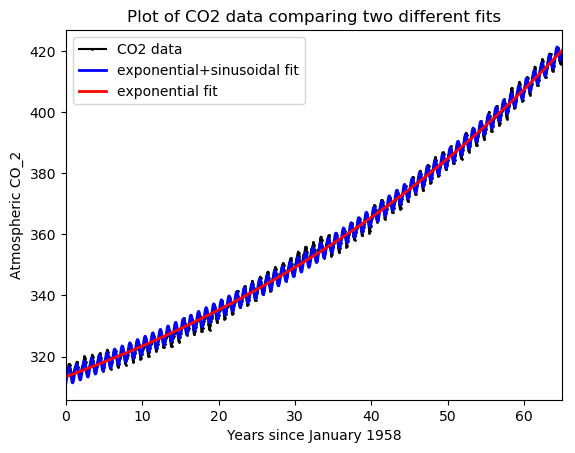

In [3]:
import matplotlib.pyplot as plt

# First plot the data
plt.plot(year, CO2, '-k.', markersize=2, label="CO2 data")

# Then plot exponential + sinusoidal fit
xplot = np.linspace(0, 65, 1000)
plt.plot(xplot, co2_seas(xplot), color="b", linewidth=2, label="exponential+sinusoidal fit")

# Then plot the exponential-only fit
plt.plot(xplot, co2_sse(xplot), color="r", linewidth=2, label="exponential fit")

# Set axis limits
plt.xlim(0,65)

# label, legends, etc. below
plt.xlabel("Years since January 1958")
plt.ylabel("Atmospheric CO_2")
plt.title("Plot of CO2 data comparing two different fits")
plt.legend(loc="upper left")


### Part b - Discussion of error

In order to see which method produces the least amount of error, we will need to plug in our optimal parameters into the error function. The following code produces the error associated with the exponential best fit and the exponential + sinusoidal best fit.

In [87]:
optimal_error = sse_adapter(sse_optimal)
seas_error = seas_sse_adapt(seas_optimal)

As computed above, the exponential+sinusoidal has an error value of 710.242619877833 and the exponential fit has significantly more error with an error value of 3861.342588415053. It is obvious that the exponential fit has more error because even though it does a great job of matching the general trend of the data, it doesn't account for the seasonal osciallations at all, which the exponential+sinusoidal fit does really well at covering. In fact, you can barely see any of the orginal data points when you plot the exponetial+sinusoidal fit over the original CO2 data.

### Part c - Prediction

In order to justify which model is more apporpriate for predicting the amount of atmoshperic CO2 at Mauana Loa in January 2023, we will compare the predicted values of the given models with the actual reported value from the data set. The following code computes these values.

In [92]:
actual_2023 = CO2[-1]
seas_2023 = co2_sse(65 + 1/12)
exp_2023 = co2_seas(65 + 1/12)

As reported from the above code the actual amount of CO2 at Mauna Loa in January 2023 was 419.47, while the exponential+sinusoidal 420.3677793885679 predicted a value of and the expionential fit predicted a value of 420.43376802559936. As can be seen from the results, although the predicted values were very close, the exponential+sinusoidal fit offered a more accurate prediction. However, since these predictions are so close either one of the models would be perfectly acceptable to use for predicting this value. In particular, since the exponential+sinusoidal fit does a better job (visually) of matching the exact trends in the graph, this is the model I would use if I had to choose just one.

## Problem 2

We'll need to load in the Salmon data again. Do that below.

In [6]:
salmon_data = np.genfromtxt('salmon_data.csv', delimiter=',')
year = salmon_data[:,0]
salmon = salmon_data[:,1]

Since we will be plotting the polynomials of best fit, we will need to show the code needed to create them. The code below will create these polynomials of best fit.

In [7]:
# Line:
line_best = np.polyfit(year, salmon, 1)

# Cubic:
cubic_best = np.polyfit(year, salmon, 3)

# Quintic:
quintic_best = np.polyfit(year, salmon, 5)


### Part a - plot

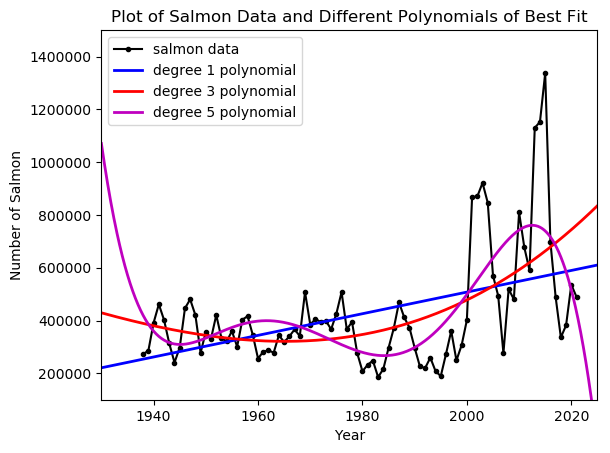

In [75]:
# Create plotting array
xplots = np.arange(1930, 2025 + 0.1, 0.1)

# First plot the data
plt.plot(year, salmon, "-k.", label="salmon data")

# Set up axis limits
plt.xlim(1930, 2025)
plt.ylim(100000, 1500000)

# Plot the three polynomials of best fit
plt.plot(xplots, np.polyval(line_best,xplots), color="b", linewidth=2, label="degree 1 polynomial")
plt.plot(xplots, np.polyval(cubic_best, xplots), color="r", linewidth=2, label="degree 3 polynomial")
plt.plot(xplots, np.polyval(quintic_best, xplots), color="m", linewidth=2, label="degree 5 polynomial")

# Labels and legend
plt.xlabel("Year")
plt.ylabel("Number of Salmon")
plt.title("Plot of Salmon Data and Different Polynomials of Best Fit")
plt.legend(loc="upper left")

### Part b - Line of best fit discussion

Since this problem requires us to comment on the slope of the best fit line, it is important to know what this value is. The following code computes the slope of the best fit line

In [8]:
best_fit_slope = line_best[0]

The slope of the best fit line is 4096.2927103371585, although this seems like a very large slope to have, in relation to the scale of the data this is actually a modest number. With this said, the slope of the line of best fit tells us how much the population of salmon changes over time. In particular since the value is positive and moderate in size in comparison to the data, we can say that in general, the data is moderately increasing over the years.

### Part c - Accuracy of predictions

In order to see which polynomial gave the best and worst prediction of the 2022 salmon population, we will take a look at the values of the erorr found in coding problem 2.

In [10]:
exact = 752638

err1 = np.abs(np.polyval(line_best, 2022) - exact) / exact
err2 = np.abs(np.polyval(cubic_best, 2022) - exact) / exact
err3 = np.abs(np.polyval(quintic_best, 2022) - exact) / exact

597816.3806655193 778961.4422616959 333701.75


As we can see from the error values calculated in coding problem 2, the cubic fit (err2) had the most accurate prediction of the 2022 salmon population as it had an error value of 0.03497490461775231. On the other hand, the least accurate prediction of the 2022 salmon population was made by the quintic fit (err3) which had an error value of 0.5566238350973509. For completeion, the line of best fit (err1) was in the middle of the cubic and quartic fit in terms of accuracy and had an error value of 0.2057052916999683.

### Part d - Predicting Salmon populations in 2050

Since we want to predict the salmon population in 2050 and rank which model we trust the most, it will be important to know the values of these predictions. Thus, the following code computes the salmon population predictions from each best polynomial best fit.

In [62]:
line_2050 = np.polyval(line_best, 2050)
cube_2050 = np.polyval(cubic_best, 2050)
quin_2050 = np.polyval(quintic_best, 2050)

As computed from the code above the line of best fit predicts a salmon population of 712,512.5765549587 in 2050, the cubic fit predicts a population of 1,458,352.528227806 salmon, and the quintic fit predicts a population of -17,028,525.5 salmon. In terms of the fit that I trust the most, I believe that the line of best fit makes the best prediction, the cubic fit makes the second-best prediction, and the quintic fit makes the worst prediction. To start off, the quintic fit obviously makes the worst prediction as it predicts the population to be negative, and obviously a population can't take a negative value. Furthermore, I believe the cubic fit makes the second-best prediction, as I feel the prediction it gives, although better than the quintic fit, will be too high when compared to the real value. In terms of the curve, the cubic fit does a good job of representing the trend of the given data points, however since the cubic polynomial keeps increasing at greater rates as time continues, it will continue to drastically overestimate the true population as the years go by. Lastly, I believe the line of best fit will produce the most trustworthy prediction of the salmon population due to its conservative estimate (not too low or too high) as well as being able to capture the gradual average increase of the population that is apparent in the plot.